In [1]:
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split, cross_validate

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


C:\Users\Piero\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Piero\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
X, y = load_digits(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
tree_max_depth = 5
model = DecisionTreeClassifier(max_depth=tree_max_depth)

In [38]:
kfold_scores = cross_validate(
    model, X_train, y_train, cv=10,
    scoring=['accuracy', 'precision_macro', 'recall_macro'],
    return_train_score=True
)

C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
kfold_scores

{'fit_time': array([0.01399207, 0.01391435, 0.01296306, 0.00998473, 0.01098013,
        0.01294184, 0.01297092, 0.00897455, 0.01297069, 0.01297092]),
 'score_time': array([0.00295234, 0.00300932, 0.00199699, 0.00199723, 0.0019536 ,
        0.00199199, 0.00195813, 0.00698423, 0.00199127, 0.00298619]),
 'test_accuracy': array([0.65957447, 0.71942446, 0.65693431, 0.72992701, 0.61654135,
        0.74242424, 0.65909091, 0.6969697 , 0.62878788, 0.73484848]),
 'train_accuracy': array([0.78441128, 0.72516556, 0.74297521, 0.76694215, 0.68533773,
        0.72921811, 0.73580247, 0.72757202, 0.7037037 , 0.72098765]),
 'test_precision_macro': array([0.70055892, 0.73026669, 0.69362071, 0.74175005, 0.71224393,
        0.76655012, 0.64664388, 0.66588203, 0.68015873, 0.73008547]),
 'train_precision_macro': array([0.86480094, 0.81435961, 0.79203059, 0.80476497, 0.79090172,
        0.74964219, 0.82025897, 0.82259199, 0.77679174, 0.74295102]),
 'test_recall_macro': array([0.65190476, 0.70897436, 0.6597069

In [40]:
df = pd.DataFrame(kfold_scores)
df

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.013992,0.002952,0.659574,0.784411,0.700559,0.864801,0.651905,0.777306
1,0.013914,0.003009,0.719424,0.725166,0.730267,0.814360,0.708974,0.716410
2,0.012963,0.001997,0.656934,0.742975,0.693621,0.792031,0.659707,0.746739
3,0.009985,0.001997,0.729927,0.766942,0.741750,0.804765,0.722967,0.762853
4,0.010980,0.001954,0.616541,0.685338,0.712244,0.790902,0.619597,0.688817
5,0.012942,0.001992,0.742424,0.729218,0.766550,0.749642,0.746337,0.729262
6,0.012971,0.001958,0.659091,0.735802,0.646644,0.820259,0.655495,0.731118
7,0.008975,0.006984,0.696970,0.727572,0.665882,0.822592,0.689560,0.717233
8,0.012971,0.001991,0.628788,0.703704,0.680159,0.776792,0.634066,0.705055
9,0.012971,0.002986,0.734848,0.720988,0.730085,0.742951,0.733516,0.723040


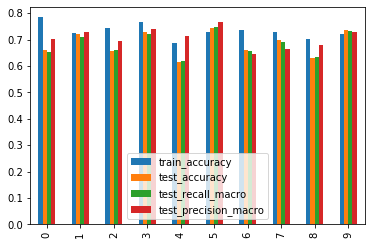

In [41]:
metrics = ['train_accuracy', 'test_accuracy', 'test_recall_macro', 'test_precision_macro']
df[ metrics ].plot.bar()

In [42]:
df['id'] = df.index

In [43]:
df_melted = df.melt(id_vars=['id'], value_vars=metrics)
df_melted

,id,variable,value
0,0,train_accuracy,0.784411
1,1,train_accuracy,0.725166
2,2,train_accuracy,0.742975
3,3,train_accuracy,0.766942
4,4,train_accuracy,0.685338
5,5,train_accuracy,0.729218
6,6,train_accuracy,0.735802
7,7,train_accuracy,0.727572
8,8,train_accuracy,0.703704
9,9,train_accuracy,0.720988


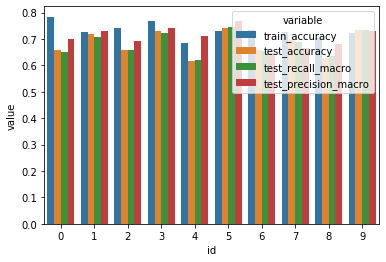

In [44]:
sns.barplot(data=df_melted, x='id', y='value', hue='variable')

In [45]:
df.describe()

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,id
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,0.012266,0.002782,0.684452,0.732212,0.706776,0.797909,0.682212,0.729783,4.50000
std,0.001694,0.001550,0.046041,0.028433,0.036711,0.036179,0.044162,0.026485,3.02765
min,0.008975,0.001954,0.616541,0.685338,0.646644,0.742951,0.619597,0.688817,0.00000
25%,0.011471,0.001991,0.657473,0.722032,0.683524,0.780319,0.652802,0.716616,2.25000
50%,0.012967,0.001997,0.678272,0.728395,0.706401,0.798398,0.674634,0.726151,4.50000
75%,0.012971,0.002978,0.727301,0.741182,0.730221,0.818784,0.719469,0.742834,6.75000
max,0.013992,0.006984,0.742424,0.784411,0.766550,0.864801,0.746337,0.777306,9.00000


In [46]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7044444444444444